In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [3]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [4]:
lam_ml = 1/np.mean(my_data)
lam_ml

5.089058524173028

(array([5., 5., 1., 4., 3., 0., 1., 0., 0., 1.]),
 array([0.006 , 0.0746, 0.1432, 0.2118, 0.2804, 0.349 , 0.4176, 0.4862,
        0.5548, 0.6234, 0.692 ]),
 <a list of 10 Patch objects>)

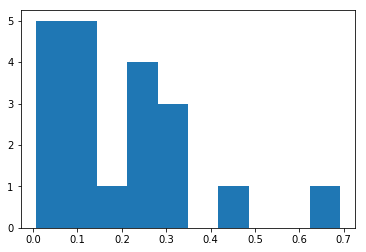

In [7]:
plt.hist(my_data,10)

In [13]:
n = 20 
lam = 3
lfHo = lam**n*np.exp(-lam*np.sum(my_data))
lfHa = lam_ml**n*exp(-lam_ml*np.sum(my_data))
t = -2*log(lfHo/lfHa)
1-stats.chi2.cdf(t,1)

0.029827229194775096

Reject null because p-value is below 0.05

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [14]:
#area to left = 0.95
# 1 degree of freedom = looking for 1 thing (lambda)
crit = stats.chi2.ppf(0.95,1)
crit

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [16]:
def log_stat(data,null,n):
    lam_m1=1/np.mean(data)
    return -2*(n*np.log(null)-n*3*np.mean(data)-n*np.log(lam_ml)+n)

In [17]:
log_stat(my_data,null=3,n=20)

4.7192223601884535

Repeat for a sample size of 50. What do you expect to happen to power? 

In [18]:
log_stat(my_data,null=3,n=50)

11.798055900471155

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

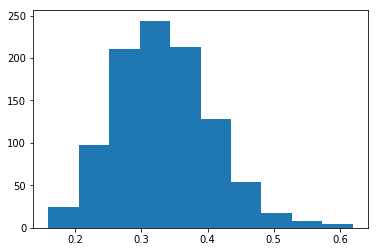

0.03

In [20]:
n = 20
ts = []
for _ in np.arange(1000):
    t = np.mean(stats.expon.rvs(scale=1/3,size=n))
    ts = np.append(ts,t)
np.mean(my_data)
plt.hist(ts)
plt.show()
2*np.mean(ts<=np.mean(my_data))

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

Graph here looks more normal. P-value is very close to the same

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [23]:
percentile(2.5,ts)

0.20564442776652608

In [24]:
percentile(97.5,ts)

0.4874374543833805

Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [27]:
n = 20
ts2 = []
for _ in np.arange(1000):
    t = np.mean(stats.expon.rvs(scale=1/5,size=n))
    ts2 = np.append(ts2,t)
np.mean(ts2>= .205) + np.mean(ts2<=.487)

1.421

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [28]:
n = 50
ts2 = []
for _ in np.arange(1000):
    t = np.mean(stats.expon.rvs(scale=1/5,size=n))
    ts2 = np.append(ts2,t)
np.mean(ts2>= .205) + np.mean(ts2<=.487)

1.425